In [1]:
import numpy as np
import pandas as pd
from urllib.parse import urlparse

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
# Setting up 'requests' to make HTTPS requests properly takes some extra steps... we'll skip them for now.
requests.packages.urllib3.disable_warnings()
# Import all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import time

In [149]:
def generate_week_strings(start_year, start_week, end_year, end_week):
    week_strings = []

    for year in range(start_year, end_year + 1):
        start = start_week if year == start_year else 1
        end = end_week if year == end_year else 53

        for week in range(start, end + 1):
          #TODO CHANGE LATER range(1, 11)
          for num in range(1, 2):
            #TODO CHANGE LATER range(1, 11)
            week_string = f"week/{year}/{week}/{num}"
            week_strings.append(week_string)

    return week_strings

start_year = 2019
start_week = 15
end_year = 2019
end_week = 20

week_strings = generate_week_strings(start_year, start_week, end_year, end_week)

In [150]:
len(week_strings)

6

In [97]:
week_strings

['week/2019/15/1',
 'week/2019/16/1',
 'week/2019/17/1',
 'week/2019/18/1',
 'week/2019/19/1',
 'week/2019/20/1']

In [98]:
list_of_articles = []
list_of_time_mk_urls = []
for week_string in week_strings:
  week_url = "https://time.mk/" + week_string
  response = requests.get(week_url)
  response.encoding = 'utf-8'
  soup = BeautifulSoup(response.text, "html.parser")
  list_of_articles.extend(soup.find_all(class_="cluster"))
for article in list_of_articles:
  first_anchor_tag = article.select_one('a')
  list_of_time_mk_urls.append("https://time.mk/" + first_anchor_tag.get("href"))

In [99]:
print(list_of_time_mk_urls)

['https://time.mk/r/c7f1686700/5e0f2e175f/', 'https://time.mk/r/39a7769074/0009000555/', 'https://time.mk/r/16ac9e0813/b627b2264c/', 'https://time.mk/r/a9fe13f048/9b0b8b7d8f/', 'https://time.mk/r/4fc944c962/9d15f427f5/', 'https://time.mk/r/97cef285e3/6deea06424/', 'https://time.mk/r/411b86dd22/3338b8c192/', 'https://time.mk/r/5883fb2934/4d51fa6f5d/', 'https://time.mk/r/e8ef900c87/2ea150d3af/', 'https://time.mk/r/b242213079/0029a8beec/', 'https://time.mk/r/e2bf3cdf59/76e2c242aa/', 'https://time.mk/r/cf070e2f0b/49809a695b/', 'https://time.mk/r/31dfd504ab/680101158d/', 'https://time.mk/r/5e18a497a7/14bdade925/', 'https://time.mk/r/37e3b066a4/0ef327ba57/', 'https://time.mk/r/001ea94025/d840eda0e5/', 'https://time.mk/r/677e518d59/4c23472f1d/', 'https://time.mk/r/a66751842a/9659ed2108/', 'https://time.mk/r/4ed844801e/fd27b67662/', 'https://time.mk/r/22b2ce97ff/34e23ea868/', 'https://time.mk/r/473d387da8/da0804e7c3/', 'https://time.mk/r/f3359c04e9/e0cb30f95d/', 'https://time.mk/r/e707d5c947/9

In [100]:
len(list_of_time_mk_urls)

60

In [101]:

def parseVecerNews(url, content):
    
  soup = BeautifulSoup(content, 'html.parser')

  title = soup.find(class_='entry-title').text.strip() if soup.find(class_='entry-title') else None
  # subtitle = soup.find(class_='td-post-sub-title').text.strip() if soup.find(class_='td-post-sub-title') else None
  subtitle = soup.find(class_='entry-title').text.strip() if soup.find(class_='entry-title') else None
  date = soup.find(class_='entry-date updated td-module-date').text.strip() if soup.find(class_='entry-date updated td-module-date') else None
  main_content = soup.find(class_='td-post-content').text.strip() if soup.find(class_='td-post-content') else None

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseNovaMakedonijaNews(url, content):
  
  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='entry-title').text.strip() if soup.find("h1", class_='entry-title') else None
  subtitle = soup.find("h1", class_='entry-title').text.strip() if soup.find("h1", class_='entry-title') else None
  date = soup.find(class_='entry-date updated td-module-date').text.strip() if soup.find(class_='entry-date updated td-module-date') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseTv21News(url, content):

  soup = BeautifulSoup(content, 'html.parser')
  title = soup.find(class_='tdb-title-text').text.strip() if soup.find(class_='tdb-title-text') else None
  subtitle = soup.find(class_='tdb-title-text').text.strip() if soup.find(class_='tdb-title-text') else None
  date = soup.find(class_='entry-date updated td-module-date').text.strip() if soup.find(class_='entry-date updated td-module-date') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = '\n'.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parse360stepeni(url, content):

  soup = BeautifulSoup(content, 'html.parser')
  title = soup.find(class_='txt--white txt--center').text.strip() if soup.find(class_='txt--white txt--center') else None
  subtitle = soup.find(class_='txt--white txt--center').text.strip() if soup.find(class_='txt--white txt--center') else None
  date = soup.find(class_='single__post-meta single__post_author txt--center').text.strip() if soup.find(class_='single__post-meta single__post_author txt--center') else None
  main_content = soup.find(class_='entry-content').text.strip() if soup.find(class_='entry-content') else None
  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseAlfaNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')

  title = soup.find(class_='entry-title').text.strip() if soup.find(class_='entry-title') else None
  subtitle = soup.find(class_='entry-title').text.strip() if soup.find(class_='entry-title') else None
  date = soup.find(class_='item-metadata posts-date').text.strip() if soup.find(class_='item-metadata posts-date') else None
  main_content = soup.find(class_='entry-content').text.strip() if soup.find(class_='entry-content') else None

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseSitelNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find('div', class_='panel-pane pane-node-title').find("h1").text.strip() if soup.find('div', class_='panel-pane pane-node-title').find("h1") else None
  subtitle = soup.find('div', class_='panel-pane pane-node-title').find("h1").text.strip() if soup.find('div', class_='panel-pane pane-node-title').find("h1") else None
  date = soup.find(class_='data-na-objava').text.strip() if soup.find(class_='data-na-objava') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseSdkNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find(class_='post-title entry-title').text.strip() if soup.find(class_='post-title entry-title') else None
  subtitle = soup.find(class_='post-title entry-title').text.strip() if soup.find(class_='post-title entry-title') else None
  date = soup.find("span", class_='value').text.strip() if soup.find("span", class_='value') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseFokusNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find(class_='post-title single-post-title entry-title').text.strip() if soup.find(class_='post-title single-post-title entry-title') else None
  subtitle = soup.find(class_='post-title single-post-title entry-title').text.strip() if soup.find(class_='post-title single-post-title entry-title') else None
  date = soup.find(class_='entry-date published').text.strip() if soup.find(class_='entry-date published') else None

  news_paragraphs = soup.find(class_="inner-post-entry entry-content").find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseSport1News(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find(class_='title').text.strip() if soup.find(class_='title') else None
  subtitle = soup.find(class_='teaser field').text.strip() if soup.find(class_='teaser field') else None
  date = soup.find(class_='submitted').text.strip() if soup.find(class_='submitted') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseKanal5News(url, content):

  #Need to decode first from bytes to text
  html_content = content.decode("utf-8")
  soup = BeautifulSoup(html_content, 'html.parser')


  title = soup.find("h1", class_='article-title').text.strip() if soup.find("h1", class_='article-title') else None
  subtitle = soup.find(class_='subtitle').text.strip() if soup.find(class_='subtitle') else None
  date = soup.find(class_='article-published').text.strip() if soup.find(class_='article-published') else None
  main_content = soup.find(class_ = 'article-text').text.strip() if soup.find(class_ = 'article-text') else None

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseRepublikaNews(url, content):

  #Need to decode first from bytes to text
  html_content = content.decode("utf-8")
  soup = BeautifulSoup(html_content, 'html.parser')


  title = soup.find("h1", class_='title mb-3').text.strip() if soup.find("h1", class_='title mb-3') else None
  subtitle = soup.find("h1", class_='title mb-3').text.strip() if soup.find("h1", class_='title mb-3') else None
  date = soup.find("span", class_='date').text.strip() if soup.find("span", class_='date') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parsePuls24News(url, content):

  #Need to decode first from bytes to text
  html_content = content.decode("utf-8")
  soup = BeautifulSoup(html_content, 'html.parser')


  title = soup.find("h1", class_='entry-title').text.strip() if soup.find("h1", class_='entry-title') else None
  subtitle = soup.find("h1", class_='entry-title').text.strip() if soup.find("h1", class_='entry-title') else None
  date = soup.find(class_='entry-date updated published').text.strip() if soup.find(class_='entry-date updated published') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseMkdNews(url, content):

  #Need to decode first from bytes to text
  html_content = content.decode("utf-8")
  soup = BeautifulSoup(html_content, 'html.parser')


  title = soup.find("h1", class_='main-article-title').text.strip() if soup.find("h1", class_='main-article-title') else None
  subtitle = soup.find("div", id='podnaslov').text.strip() if soup.find("div", id='podnaslov') else None
  date = soup.find(class_='row mx-0 article-info mb-3').find("div").find("div").text.strip() if soup.find(class_='row mx-0 article-info mb-3').find("div").find("div") else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      "url" : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseAlsatNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='post-title entry-title').text.strip() if soup.find("h1", class_='post-title entry-title') else None
  subtitle = soup.find(class_='entry-sub-title').text.strip() if soup.find(class_='entry-sub-title') else None
  date = soup.find(class_='date meta-item tie-icon').text.strip() if soup.find(class_='date meta-item tie-icon') else None

  news_paragraphs = soup.find_all('p')
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseSlobodnaEvropaNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='title pg-title').text.strip() if soup.find("h1", class_='title pg-title') else None
  subtitle = soup.find("h1", class_='title pg-title').text.strip() if soup.find("h1", class_='title pg-title') else None
  date = soup.find("time").text.strip() if soup.find("time") else None
  main_content = soup.find(class_="wsw").text.strip() if soup.find(class_="wsw") else None

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseMakfaksNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='mvp-post-title left entry-title').text.strip() if soup.find("h1", class_='mvp-post-title left entry-title') else None
  subtitle = soup.find("h1", class_='mvp-post-title left entry-title').text.strip() if soup.find("h1", class_='mvp-post-title left entry-title') else None
  date = soup.find(class_="post-date updated").text.strip() if soup.find(class_="post-date updated") else None

  news_paragraphs = soup.find(id="mvp-content-main").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseMkVoaNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='title pg-title').text.strip() if soup.find("h1", class_='title pg-title') else None
  subtitle = soup.find("h1", class_='title pg-title').text.strip() if soup.find("h1", class_='title pg-title') else None
  date = soup.find("time").text.strip() if soup.find("time") else None

  news_paragraphs = soup.find(class_="wsw").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseNetpressNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='entry-title').text.strip() if soup.find("h1", class_='entry-title') else None
  subtitle = soup.find("h1", class_='entry-title').text.strip() if soup.find("h1", class_='entry-title') else None
  date = soup.find(class_="entry-date updated td-module-date").text.strip() if soup.find(class_="entry-date updated td-module-date") else None

  news_paragraphs = soup.find(class_="td-post-content").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseSlobodenPecatNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='post-main-title').text.strip() if soup.find("h1", class_='post-main-title') else None
  subtitle = soup.find("h1", class_='post-main-title').text.strip() if soup.find("h1", class_='post-main-title') else None
  date = soup.find("time")["datetime"].strip() if soup.find("time") else None

  news_paragraphs = soup.find(class_="post-body-inner").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseMakpressNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')

  title = soup.find("div", class_='page-header').find("h1").text.strip() if soup.find("div", class_='page-header') else None
  subtitle = soup.find("div", class_='page-header').find("h1").text.strip() if soup.find("div", class_='page-header').find("h1") else None
  date = soup.find("div", class_="time").text.strip() if soup.find("div", class_="time") else None

  news_paragraphs = soup.find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs[:-1])

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseDWNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')

  title = soup.select_one(".content-area").find("header").find("h1").text.strip() if soup.select_one(".content-area").find("header").find("h1") else None
  subtitle = soup.select_one(".content-area").find("header").find("h1").text.strip() if soup.select_one(".content-area").find("header").find("h1") else None
  date = soup.find("time").text.strip() if soup.find("time") else None

  news_paragraphs = soup.select_one(".rich-text.has-italic").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs[:-1])

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parse24MkNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')

  title = soup.find(class_="post-title-area").find("h2", class_='post-title').text.strip() if soup.find(class_="post-title-area").find("h2", class_='post-title') else None
  subtitle = soup.find(class_="post-title-area").find("h2", class_='post-title').text.strip() if soup.find(class_="post-title-area").find("h2", class_='post-title') else None
  date = soup.find("span", class_="post-date").text.strip() if soup.find("span", class_="post-date") else None

  news_paragraphs = soup.find(class_="entry-content").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs[:-1])

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseRadioMofNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='post-title').text.strip() if soup.find("h1", class_='post-title') else None
  subtitle = soup.find("h1", class_='post-title').text.strip() if soup.find("h1", class_='post-title') else None
  date = soup.find("time")["datetime"].strip() if soup.find("time")["datetime"] else None

  news_paragraphs = soup.find(class_="post-content description").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs[:-1])

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseCentarMkNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='entry-title penci-entry-title penci-title-center').text.strip() if soup.find("h1", class_='entry-title penci-entry-title penci-title-center') else None
  subtitle = soup.find("h1", class_='entry-title penci-entry-title penci-title-center').text.strip() if soup.find("h1", class_='entry-title penci-entry-title penci-title-center') else None
  date = soup.find("time")["datetime"].strip() if soup.find("time")["datetime"] else None

  news_paragraphs = soup.find(class_="penci-entry-content entry-content").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs[:-1])

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseA1OnNews(url, content):

  soup = BeautifulSoup(content, 'html.parser')


  title = soup.find("h1", class_='entry-title penci-entry-title').text.strip() if soup.find("h1", class_='entry-title penci-entry-title') else None
  subtitle = soup.find("h1", class_='entry-title penci-entry-title').text.strip() if soup.find("h1", class_='entry-title penci-entry-title') else None
  date = soup.find("time")["datetime"].strip() if soup.find("time")["datetime"] else None

  news_paragraphs = soup.find(class_="penci-entry-content entry-content").find_all("p")
  # Accumulate the text from all news paragraphs
  main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs[:-1])

  news_data = {
      'url' : url,
      'title': title,
      'subtitle': subtitle,
      'date': date,
      'main_content': main_content
  }

  return news_data

def parseTelmaNews(url, content):

    soup = BeautifulSoup(content, 'html.parser')
    title = soup.find(class_="entry-title penci-entry-title penci-title-").text.strip() if soup.find(class_="entry-title penci-entry-title penci-title-") else None
    subtitle = soup.find(class_="entry-title penci-entry-title penci-title-").text.strip() if soup.find(class_="entry-title penci-entry-title penci-title-") else None
    date = soup.find("time")["datetime"].strip() if soup.find("time")["datetime"] else None

    news_paragraphs = soup.find(class_="penci-entry-content entry-content").find_all("p")
    # Accumulate the text from all news paragraphs
    main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

    news_data = {
        'url' : url,
        'title': title,
        'subtitle': subtitle,
        'date': date,
        'main_content': main_content
    }
    
    return news_data

def parseEMagazinNews(url, content):

    soup = BeautifulSoup(content, 'html.parser')
    title = soup.find(class_="entry-title penci-entry-title penci-title-").text.strip() if soup.find(class_="entry-title penci-entry-title penci-title-") else None
    subtitle = soup.find(class_="entry-title penci-entry-title penci-title-").text.strip() if soup.find(class_="entry-title penci-entry-title penci-title-") else None
    date = soup.find("time")["datetime"].strip() if soup.find("time")["datetime"] else None

    news_paragraphs = soup.find(class_="penci-entry-content entry-content").find_all("p")
    # Accumulate the text from all news paragraphs
    main_content = ' '.join(paragraph.get_text() for paragraph in news_paragraphs)

    news_data = {
        'url' : url,
        'title': title,
        'subtitle': subtitle,
        'date': date,
        'main_content': main_content
    }
    
    return news_data

In [102]:
from requests.exceptions import ConnectTimeout, ConnectionError
from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter
session = requests.Session()
retries = Retry(total=5, backoff_factor=0.1, status_forcelist=[500, 502, 503, 504])
adapter = HTTPAdapter(max_retries=retries)
session.mount('http://', adapter)
session.mount('https://', adapter)

successfully_accessed_sites = []
successfully_accessed_hostnames = []
unsuccessfully_accessed_sites = []

real_urls_list = []
parsedTexts = []

start_time = time.time()


for time_url in list_of_time_mk_urls:
    try:
          response = requests.get(time_url)
          # Gets the real url for each time.mk url.
          real_url = response.url
          real_urls_list.append(real_url)
          if response.status_code!=200:
                unsuccessfully_accessed_sites.append(real_url)
          else:
            successfully_accessed_sites.append(real_url)
            successfully_accessed_hostnames.append(urlparse(real_url).hostname)
            # Gets the html content for each response
            content = response.content
            # Gets the hostname for each url
            hostname = urlparse(real_url).hostname
            if hostname == "www.vecer.press":
                parsedTexts.append(parseVecerNews(real_url, content))
            elif hostname == "mk.tv21.tv":
                parsedTexts.append(parseTv21News(real_url, content))
            elif hostname == "360stepeni.mk":
                parsedTexts.append(parse360stepeni(real_url, content))
            elif hostname == "alfa.mk":
                parsedTexts.append(parseAlfaNews(real_url, content))
            elif hostname == "sitel.com.mk":
                parsedTexts.append(parseSitelNews(real_url, content))
            elif hostname == "sdk.mk":
                parsedTexts.append(parseSdkNews(real_url, content))
            elif hostname == "fokus.mk":
                parsedTexts.append(parseFokusNews(real_url, content))
            elif hostname == "sport1.mk":
                parsedTexts.append(parseSport1News(real_url, content))
            elif hostname == "kanal5.com.mk":
                parsedTexts.append(parseKanal5News(real_url, content))
            elif hostname == "republika.mk":
                parsedTexts.append(parseRepublikaNews(real_url, content))
            elif hostname == "puls24.mk":
                parsedTexts.append(parsePuls24News(real_url, content))
            elif hostname == "mkd.mk":
                parsedTexts.append(parseMkdNews(real_url, content))
            elif hostname == "novamakedonija.com.mk":
                parsedTexts.append(parseNovaMakedonijaNews(real_url, content))
            elif hostname == "alsat.mk":
                parsedTexts.append(parseAlsatNews(real_url, content))
            elif hostname == "www.slobodnaevropa.mk":
                parsedTexts.append(parseSlobodnaEvropaNews(real_url, content))
            elif hostname == "makfax.com.mk":
                parsedTexts.append(parseMakfaksNews(real_url, content))
            elif hostname == "mk.voanews.com":
                parsedTexts.append(parseMkVoaNews(real_url, content))
            elif hostname == "netpress.com.mk":
                parsedTexts.append(parseNetpressNews(real_url, content))
            elif hostname == "www.slobodenpecat.mk":
                parsedTexts.append(parseSlobodenPecatNews(real_url, content))
            elif hostname == "makpress.mk":
                parsedTexts.append(parseMakpressNews(real_url, content))
            elif hostname == "www.dw.com":
                parsedTexts.append(parseDWNews(real_url, content))
            elif hostname == "24.mk":
                parsedTexts.append(parse24MkNews(real_url, content))
            elif hostname == "www.radiomof.mk":
                parsedTexts.append(parseRadioMofNews(real_url, content))
            elif hostname == "centar.mk":
                parsedTexts.append(parseCentarMkNews(real_url, content))
            elif hostname == "a1on.mk":
                parsedTexts.append(parseA1OnNews(real_url, content))
            elif hostname == "telma.com.mk":
                parsedTexts.append(parseTelmaNews(real_url, content))
            elif hostname == "emagazin.mk":
                parsedTexts.append(parseEMagazinNews(real_url, content))
#             else:
#                 parsedTexts.append("Parse function for hostname " + hostname + " doesn't exist yet.")

    except (ConnectTimeout, ConnectionError) as e:
        print(f"Error connecting to {time_url}: {str(e)}")
        unsuccessfully_accessed_sites.append(time_url)
        continue
        
end_time = time.time()
total_time = end_time - start_time

print(f"The total time to parse all news sites is {total_time} seconds.")

In [103]:
len(real_urls_list)

60

In [104]:
print(successfully_accessed_sites)
print(successfully_accessed_hostnames)
print(unsuccessfully_accessed_sites)

['https://24.mk/details/zaev-republika-severna-makedonija-kje-dobie-pretsedatel-koj-ne-e-zatalkan-patnik-tuku-vodach', 'https://kanal5.com.mk/articles/372931/siljanovska-davkova-loshata-politika-ne-mozhe-da-go-zgazi-pravoto', 'https://24.mk/details/znm-vmro-dpmne-da-se-izvini-za-etiketiranjeto-mediumi', 'https://24.mk/details/makedonija-vecherva-protiv-island-go-zaveruva-plasmanot-na-ep-2020', 'https://24.mk/details/akhmeti-pretsedatelot-vo-zaminuvanje-nema-legitimitet-da-gi-pomiluva-osudenite-za-krvaviot-chetvrtok', 'https://fokus.mk/sela-nie-nekogash-nema-da-poddrzhime-nekoj-koj-ne-e-kako-nas-i-ne-e-albanets/', 'https://smart.sdk.mk/stil/arhitektura/frantsija-ke-raspishe-megunaroden-konkurs-za-nova-kula-na-notr-dam/', 'https://24.mk/details/kiracovski-pendarovski-kje-ostvari-sigurna-pobeda-i-vo-vtoriot-izboren-krug', 'https://prizma.mk/pendarovski-i-siljanovska-so-tesna-razlika-odat-vo-vtor-krug-na-pretsedatelski-izbori/', 'https://prizma.mk/se-glasa-za-petiot-pretsedatel-na-shestite

In [106]:
len(successfully_accessed_sites)

42

In [107]:
len(parsedTexts)

31

In [44]:
# parsedTexts

In [108]:
news_items = parsedTexts.copy()

In [109]:
news_items

[{'url': 'https://24.mk/details/zaev-republika-severna-makedonija-kje-dobie-pretsedatel-koj-ne-e-zatalkan-patnik-tuku-vodach',
  'title': 'Заев: Република Северна Македонија ќе добие претседател кој не е заталкан патник туку водач',
  'subtitle': 'Заев: Република Северна Македонија ќе добие претседател кој не е заталкан патник туку водач',
  'date': '14.04.2019',
  'main_content': 'Во своето обраќање лидерот на СДСМ и премиер Зоран Заев рече „заврши времето на криминалци и заштитници на криминалот“. – Република\xa0 Северна Македонија ќе добие претседател за кого иднината на државата не е авантура, туку должност, а тој не е заталкан патник туку водач. Ги победивме поделбите, омразата, конфликтите и немирот. Европа аплаудира, а граѓаните сакаат да продолжи нашата политика да се оди напред. Новиот претседател ќе биде човек кој сака, може и мора да влече напред – тоа е Стево Пендаровски, рече Заев на централниот митинг\xa0 во главниот град. Веќе сме, рече лидерот на СДСМ, дел од НАТО и до 

In [110]:
for news_item in news_items:
    news_item['main_content'] = news_item['main_content'].replace('\n', '') if news_item['main_content'] != None else None
    news_item['main_content'] = news_item['main_content'].replace('\xa0', '') if news_item['main_content'] != None else None
    news_item['title'] = news_item['title'].replace('\xa0', '') if news_item['title'] != None else None
    news_item['subtitle'] = news_item['subtitle'].replace('\xa0', '') if news_item['subtitle'] != None else None

In [111]:
url_text_map = {}
for news_item in news_items:
  entry_url = news_item["url"]
  text = f"{news_item['title']}. {news_item['subtitle']}. {news_item['main_content']}"
  url_text_map[entry_url] = text

In [112]:
print(url_text_map)

{'https://24.mk/details/zaev-republika-severna-makedonija-kje-dobie-pretsedatel-koj-ne-e-zatalkan-patnik-tuku-vodach': 'Заев: Република Северна Македонија ќе добие претседател кој не е заталкан патник туку водач. Заев: Република Северна Македонија ќе добие претседател кој не е заталкан патник туку водач. Во своето обраќање лидерот на СДСМ и премиер Зоран Заев рече „заврши времето на криминалци и заштитници на криминалот“. – Република Северна Македонија ќе добие претседател за кого иднината на државата не е авантура, туку должност, а тој не е заталкан патник туку водач. Ги победивме поделбите, омразата, конфликтите и немирот. Европа аплаудира, а граѓаните сакаат да продолжи нашата политика да се оди напред. Новиот претседател ќе биде човек кој сака, може и мора да влече напред – тоа е Стево Пендаровски, рече Заев на централниот митинг во главниот град. Веќе сме, рече лидерот на СДСМ, дел од НАТО и до крајот на годината ќе бидеме 30-та рамноправна членка. -Одиме кон ЕУ и очекуваме, нагла

In [113]:
!pip install transformers
!pip install nlp
!pip install sentencepiece
!pip install torch
!pip install spacy
!pip install vaderSentiment
!pip install textblob
!pip install wordcloud matplotlib

In [114]:
# !python -m spacy download en_core_web_sm

In [115]:
import transformers
import nlp
import torch
import spacy
from transformers import pipeline
from transformers import MarianMTModel, MarianTokenizer

import nltk
# nltk.download('punkt')

In [116]:
# Deprecated

# def chunk_text(text, tokenizer, max_length=1024):
#     # Split the text into sentences
#     sentences = nltk.sent_tokenize(text)
    
#     chunks = []
#     current_chunk = []
#     current_length = 0
    
#     for sentence in sentences:
#         # Tokenize the sentence to get its length
#         sentence_length = len(tokenizer.tokenize(sentence))
        
#         if current_length + sentence_length <= max_length:
#             current_chunk.append(sentence)
#             current_length += sentence_length
#         else:
#             chunks.append(" ".join(current_chunk))
#             current_chunk = [sentence]
#             current_length = sentence_length
    
#     if current_chunk:
#         chunks.append(" ".join(current_chunk))
    
#     return chunks


In [117]:
# # METHOD 1: Translate using MarianMT, A framework for translation models
# # Helsinki-NLP/opus-mt-mk-en

# # Load the pre-trained model and tokenizer
# model_name = "Helsinki-NLP/opus-mt-mk-en"
# model = MarianMTModel.from_pretrained(model_name)
# tokenizer = MarianTokenizer.from_pretrained(model_name)

In [118]:
# start_time = time.time()

# url_text_list = list(url_text_map.items())
# marian_translated_texts = {}
# for url_text in url_text_list[:1]:

#     # Define the input Macedonian text
    
#     input_url = url_text[0]
#     input_text = url_text[1]

#     # Split text into sentences using the Natural Language Toolkit Library
#     sentences = nltk.sent_tokenize(input_text)
    
#     # Translate each sentence separately
#     translated_sentences = []
#     for sentence in sentences:
#         input_ids = tokenizer.encode(sentence, return_tensors="pt")
#         with torch.no_grad():
#             translated_ids = model.generate(input_ids)
#         translated_sentence = tokenizer.decode(translated_ids[0], skip_special_tokens=True)
#         translated_sentences.append(translated_sentence)

#     # Combine translated sentences
#     translated_text = " ".join(translated_sentences)
#     marian_translated_texts[input_url] = translated_text
    
    
# end_time = time.time()
# total_time = end_time - start_time

# print(f"The total time to translate the text is {total_time} seconds.")

In [119]:
# marian_translated_texts

In [120]:
!pip install googletrans==4.0.0rc1

In [121]:
# METHOD 2: Translate using Google Translate API
from googletrans import Translator
import time
import random

# Time and random are so that google doesn't block my IP address because of a large number of requests

start_time = time.time()
url_text_list = list(url_text_map.items())
google_translated_texts = {}
translator = Translator()
for url_text in url_text_list:
    translated_text = translator.translate(url_text[1][:5000], src='mk', dest='en').text
    google_translated_texts[url_text[0]] = translated_text
    time.sleep(random.uniform(0.02, 0.1))

end_time = time.time()
total_time = end_time - start_time

print(f"The total time to translate the text is {total_time} seconds.")

The total time to translate the text is 51.899248361587524 seconds.


In [122]:
len(google_translated_texts)

31

In [123]:
print(google_translated_texts)

{'https://24.mk/details/zaev-republika-severna-makedonija-kje-dobie-pretsedatel-koj-ne-e-zatalkan-patnik-tuku-vodach': 'Zaev: Republic of Northern Macedonia will receive a president who is not a stray passenger but a leader.Zaev: Republic of Northern Macedonia will receive a president who is not a stray passenger but a leader.In his address, SDSM leader and Prime Minister Zoran Zaev said "The time of criminals and crime protectors ended".- The Republic of Northern Macedonia will receive a president for whom the future of the state is not an adventure, but a duty, and he is not a stray passenger but a leader.We defeated divisions, hatred, conflicts and unrest.Europe applauds, and citizens want our policy to move forward.The new president will be a man who wants, can and must pull forward - that is Stevo Pendarovski, Zaev said at the central rally in the capital.We are already, said the SDSM leader, part of NATO and by the end of the year we will be an equal member."We go to the EU and e

In [ ]:
# # METHOD 3: Translate using distilled version of the  Facebook Neural Language Model for Low-Resource Languages (NLLB-200)
# from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-600M", src_lang="mk_Cyrl")
# model = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")


In [ ]:
# start_time = time.time()


# url_text_list = list(url_text_map.items())
# nllb_translated_texts = {}
# for url_text in url_text_list[:1]:
    
#     # Define the input Macedonian text
    
#     input_url = url_text[0]
#     input_text = url_text[1]
    
#     sentences = nltk.sent_tokenize(input_text)

#     translated_sentences = []
#     for sentence in sentences:
#         inputs = tokenizer(sentence, return_tensors="pt")
#         translated_tokens = model.generate(
#         **inputs, forced_bos_token_id=tokenizer.lang_code_to_id["eng_Latn"]
#         )
#         translated_sentence = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
#         translated_sentences.append(translated_sentence)
    
#     # Combine translated sentences
#     translated_text = " ".join(translated_sentences)
#     nllb_translated_texts[input_url] = translated_text
    
# end_time = time.time()
# total_time = end_time - start_time

# print(f"The total time to translate the text is {total_time} seconds.")

In [ ]:
# nllb_translated_texts

In [46]:
# print(marian_translated_texts)
print(google_translated_texts)
# print(nllb_translated_texts)

{'https://www.vecer.press/%D1%81%D0%B0%D0%BD%D0%B8%D1%80%D0%B0%D1%9A%D0%B5%D1%82%D0%BE-%D0%BD%D0%B0-%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%82-%D0%B1%D0%B5%D0%BB%D0%B0%D1%81%D0%B8%D1%86%D0%B0-%D0%BD%D0%B0%D1%98/': 'The repair of the Belasica Bridge may end up by July 15.The repair of the Belasica Bridge may end up by July 15.At the request of the City of Skopje, the Institute for Seismic Resistant Buildings and Climate Change of Professor Mikhail Garevski will make expertise and check the reliability and damage to the Belasica Bridge at East Gate TC.According to Garevski, if the check shows that there is only non -constructive damage, repairing the most optimistic may be completed by July 10 - 15, and if detailed analysis shows the need for more serious remediation, it is not possible to complete in less than six months of the City of Skopje request,Institute for Seismic Resistant Buildings and Climate Change of Professor Mikhail Garevski will do expertise and check the safety and damage to 

In [ ]:
# CONTINUE USING ONLY GOOGLE TRANSLATED TEXTS FOR BEST ACCURACY

In [124]:
# Function to aggregate the sentiment for a single entity, since a single entity will have multiple sentiments
# if the entity is present in multiple sentences.
# sentiments contains a list of all the sentiments for a single entity that were gathered from the text

def aggregate_sentiment(sentiments):
    # Initialize counters
    total_positive = 0
    total_negative = 0
    count_positive = 0
    count_negative = 0
    
    for sentiment in sentiments:
        if sentiment['label'] == 'POSITIVE':
            total_positive += sentiment['score']
            count_positive += 1
        elif sentiment['label'] == 'NEGATIVE':
            total_negative += sentiment['score']
            count_negative += 1
            
    # Calculate averages
    avg_positive = total_positive / count_positive if count_positive != 0 else 0
    avg_negative = total_negative / count_negative if count_negative != 0 else 0


    if total_positive > total_negative:
        return {'label': 'POSITIVE', 'score': avg_positive, 'total_positive': total_positive, 'total_negative': total_negative, 'count_positive': count_positive, 'count_negative': count_negative}
    else:
        return {'label': 'NEGATIVE', 'score': avg_negative, 'total_positive': total_positive, 'total_negative': total_negative, 'count_positive': count_positive, 'count_negative': count_negative}

In [125]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define sentiment analysis pipeline using transformers
# sentiment_pipeline = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Extracts entities and sentiment for a single text
def extract_entities_and_sentiment(text):
    doc = nlp(text)
    
    # Store entity sentiments
    entity_sentiments = {}
    # Store sentences for each entity
    entity_sentences = {}
    # map of entity, list of sentences that contain entity
    for ent in doc.ents:
        if ent.text not in entity_sentences:
            entity_sentences[ent.text] = [ent.sent.text]
        else:
            entity_sentences[ent.text].append(ent.sent.text)
            
    for entity, sentences in entity_sentences.items():
        sentiments = []
        for sentence in sentences:
            sentiment = sentiment_pipeline(sentence)
            sentiments.append(sentiment[0])
        
    
        entity_sentiments[entity] = aggregate_sentiment(sentiments)

    return entity_sentiments



In [126]:
entity_sentiments = []
google_translated_texts_list = list(google_translated_texts.items())
url_sentiments = []
for url_translated_text in google_translated_texts_list:
    entity_sentiments = extract_entities_and_sentiment(url_translated_text[1])
    url_sentiments.append([url_translated_text[0], entity_sentiments])
    

 

In [127]:
url_sentiments

[['https://24.mk/details/zaev-republika-severna-makedonija-kje-dobie-pretsedatel-koj-ne-e-zatalkan-patnik-tuku-vodach',
  {'Zaev': {'label': 'NEGATIVE',
    'score': 0.9454014450311661,
    'total_positive': 2.9939094185829163,
    'total_negative': 3.7816057801246643,
    'count_positive': 3,
    'count_negative': 4},
   'SDSM': {'label': 'POSITIVE',
    'score': 0.9980232417583466,
    'total_positive': 1.9960464835166931,
    'total_negative': 0.918300211429596,
    'count_positive': 2,
    'count_negative': 1},
   'Zoran Zaev': {'label': 'NEGATIVE',
    'score': 0.918300211429596,
    'total_positive': 0,
    'total_negative': 0.918300211429596,
    'count_positive': 0,
    'count_negative': 1},
   'The Republic of Northern Macedonia': {'label': 'POSITIVE',
    'score': 0.9984772801399231,
    'total_positive': 0.9984772801399231,
    'total_negative': 0,
    'count_positive': 1,
    'count_negative': 0},
   'Europe': {'label': 'POSITIVE',
    'score': 0.9989223480224609,
    'tota

In [78]:
# THE FINAL RESULT UNTIL NOW IS url_sentiments: List of [url, entity_sentiments: map of key entity and value sentiment]

In [128]:
def get_hostname(url):
    return urlparse(url).hostname


# entity_sentiments1, entity_sentiments2 are maps with key entity and value sentiment
def merge_sentiments(entity_sentiments1, entity_sentiments2):
    for entity, sentiment_values in entity_sentiments2.items():
        if entity not in entity_sentiments1:
            entity_sentiments1[entity] = sentiment_values
        else:
            for key, value in sentiment_values.items():
                if key.startswith('total_') or key.startswith('count_'):
                    entity_sentiments1[entity][key] += value
               
    return entity_sentiments1

In [129]:
# import copy
# test = url_sentiments[0]
# test_list = [copy.deepcopy(test) for _ in range(4)]

In [130]:
# test_list

In [131]:
# Transform from url_sentiments list to hostname_sentiments list
# Merge the sentiment values for the same entity
# Append the sentiment values for new entities
hostname_sentiments = {}

for url, sentiments in url_sentiments:
    hostname = get_hostname(url)
    if hostname not in hostname_sentiments:
        hostname_sentiments[hostname] = sentiments
    else:
        hostname_sentiments[hostname] = merge_sentiments(hostname_sentiments[hostname], sentiments)

# Convert the dictionary back to a list
hostname_sentiments_list = [[hostname, sentiments] for hostname, sentiments in hostname_sentiments.items()]

print(hostname_sentiments_list)

[['24.mk', {'Zaev': {'label': 'NEGATIVE', 'score': 0.9454014450311661, 'total_positive': 2.9939094185829163, 'total_negative': 3.7816057801246643, 'count_positive': 3, 'count_negative': 4}, 'SDSM': {'label': 'POSITIVE', 'score': 0.9980232417583466, 'total_positive': 3.713088095188141, 'total_negative': 2.6523898243904114, 'count_positive': 4, 'count_negative': 3}, 'Zoran Zaev': {'label': 'NEGATIVE', 'score': 0.918300211429596, 'total_positive': 0, 'total_negative': 0.918300211429596, 'count_positive': 0, 'count_negative': 1}, 'The Republic of Northern Macedonia': {'label': 'POSITIVE', 'score': 0.9984772801399231, 'total_positive': 0.9984772801399231, 'total_negative': 0, 'count_positive': 1, 'count_negative': 0}, 'Europe': {'label': 'POSITIVE', 'score': 0.9989223480224609, 'total_positive': 0.9989223480224609, 'total_negative': 0, 'count_positive': 1, 'count_negative': 0}, 'Stevo Pendarovski': {'label': 'POSITIVE', 'score': 0.9980781972408295, 'total_positive': 2.994282603263855, 'tota

In [132]:
print("Max index that can be set as hostname_index is " + str(len(hostname_sentiments_list) - 1))

Max index that can be set as hostname_index is 4


In [145]:
i=0
for hostname, sentiment in hostname_sentiments_list:
    print(str(i) + ": " + hostname)
    i+=1

0: 24.mk
1: kanal5.com.mk
2: fokus.mk
3: makfax.com.mk
4: netpress.com.mk


In [146]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = hostname_sentiments_list

hostname_index = 4

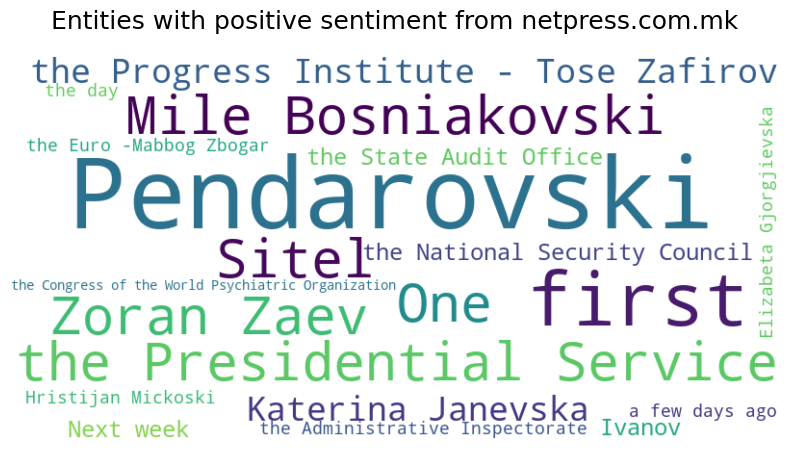

In [147]:

# Extract entities and their respective counts (here I'm using the positive counts)
word_frequencies = {entity: details['count_positive'] for entity, details in data[hostname_index][1].items()}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_frequencies)


plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Entities with positive sentiment from " + data[hostname_index][0], fontsize=18, pad=20)  # Adding a title here
plt.show()

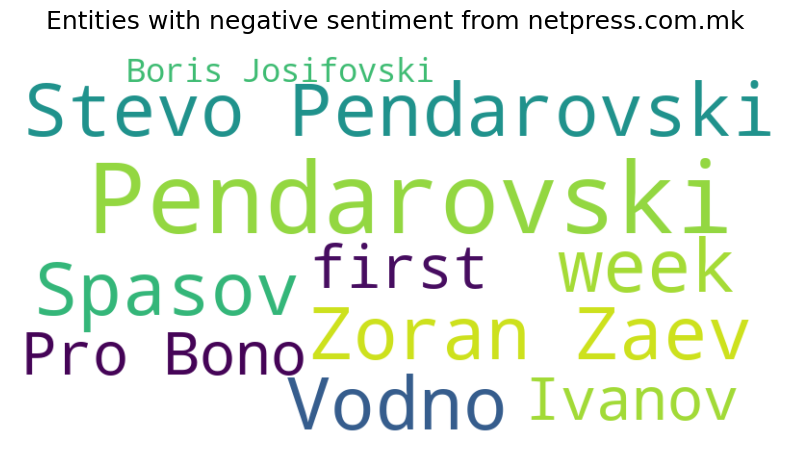

In [148]:


# Extract entities and their respective counts (here I'm using the negative counts)
word_frequencies = {entity: details['count_negative'] for entity, details in data[hostname_index][1].items()}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_frequencies)


plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Entities with negative sentiment from " + data[hostname_index][0], fontsize=18, pad=20)  # Adding a title here
plt.show()

In [39]:
# WRITE NEWS TO FILE
################################################################################################################################
# file_path = "final.txt"
# delimiter = "____###DELIMITER###____"  # Choose a delimiter that won't appear in your data

# with open(file_path, "w", encoding="utf-8") as file:
#     # Iterate through the map and write each key-value pair
#     for key, value in translated_texts.items():
#         file.write(f"{key}{delimiter}{value}\n")  # Add a newline character after each pair

# print("Key-value pairs written to the file successfully.")

In [40]:
# READ NEWS FROM FILE
################################################################################################################################
# file_path = "final.txt"
# delimiter = "____###DELIMITER###____"  # The same delimiter you used while saving

# read_map = {}

# with open(file_path, "r", encoding="utf-8") as file:
#     for line in file:
#         key, value = line.strip().split(delimiter, 1)
#         read_map[key] = value

# print("Key-value pairs read from the file:", read_map)